# Titanic Prediction of Survivors using ML Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Classification Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron

# 1. Exploratory Data Analysis

Loading the train and test dataset from local

In [2]:
Train_df = pd.read_csv("C:/Users/nifaullah/Downloads/msba/WinBreak/Titanic/Train.csv")

In [3]:
Test_df = pd.read_csv("C:/Users/nifaullah/Downloads/msba/WinBreak/Titanic/Test.csv")

# 1.1 Data

As we can see from the data we've a training set with 891 observations and 12 features and a test set with 418 observations and 11 features

In [4]:
Train_df.shape

(891, 12)

In [5]:
Test_df.shape

(418, 11)

Now let's take a look at the column names to check if the columns are same in train and test set and that the Survived column  is missing in the test set. As we can see from below all columns are as expected.

In [6]:
Train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
Test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now let's take a look at the train set info if we've any missing values.

It seems that all columns except Age, Cabin and Embarked seem to have all values in order.

Age seems to be missing 177 values, on an initial level it seems imprudent to drop Age column, we need further analysis to assert it confidently

Cabin is missing around 690, which is more than 80% of the totatl data. On intuition, it seems to better to drop this but we need further ananlysis before we decide.

Embarked is also missing 2 values, This is minimal and we can move forward by assigning the Mode to these missing values

In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Test dataset also has missing values for Age and Cabin.

Most likely we'll do the  same treatment here we do to the train set missing values.

In [9]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Passenger Id: As expected this a unique value column to uniquely identify each passenger. This will not help much in our analysis.

Name: 891 different values, again not so helpful for our analysis

Survived, Pclass, Sex and Embarked : Categorical Variables with  2/3 categories

Also Fare with 248 unique values suggest that probably the fares were not same even if passengers belonged to same class

Ticket has 681 unique but no null values immplicitly suggest that probably some ticket had same number, may be passenger who had families bought tickets together for entire family. But we need to do further analysis before we decide it.

In [10]:
Train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Proportionately, Nothing out of place here except that Parch (Parent/Child on board) has one more unique value.

In [11]:
Test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# 1.2 Descriptive Statistics

Survived: A mean of 0.38 suggests that our datset has slightly more values of not survied when compared with survived.

Pclass: Clearly number of passengers in 3rd class were greater than number of passengers in 1st and 2nd class.

Sibsp, Parch: Close to 25 %  of passengers have a sibling on board but isn't as same as that of Parent Child, again on an initial level it seems families onboard mostly had more than one child.

In [12]:
Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Most if not all columns match closely with the training set which means our training set is possibly well represented to cover for the training test

In [13]:
Test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# 1.3 Feature Analysis & Data Wrangling

# 1.3.1 Correlation Matrix and Pairplot

As expected Class has a very high and positive correlation with survived.

However negative correlation of Age with class discounting the number factor suggest that Class 3 had more young passengers.

Any analysis without gender is incomplete considering that it may play a important role in our model.

In [14]:
Train_df.corr().iloc[1,:]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Pairplot below reconfirms above analysis however Parch seems to be showing somewhat significant difference in the distribution for both groups. We'll do further analysis to check if that's the case

C:\Users\nifaullah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nifaullah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nifaullah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nifaullah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


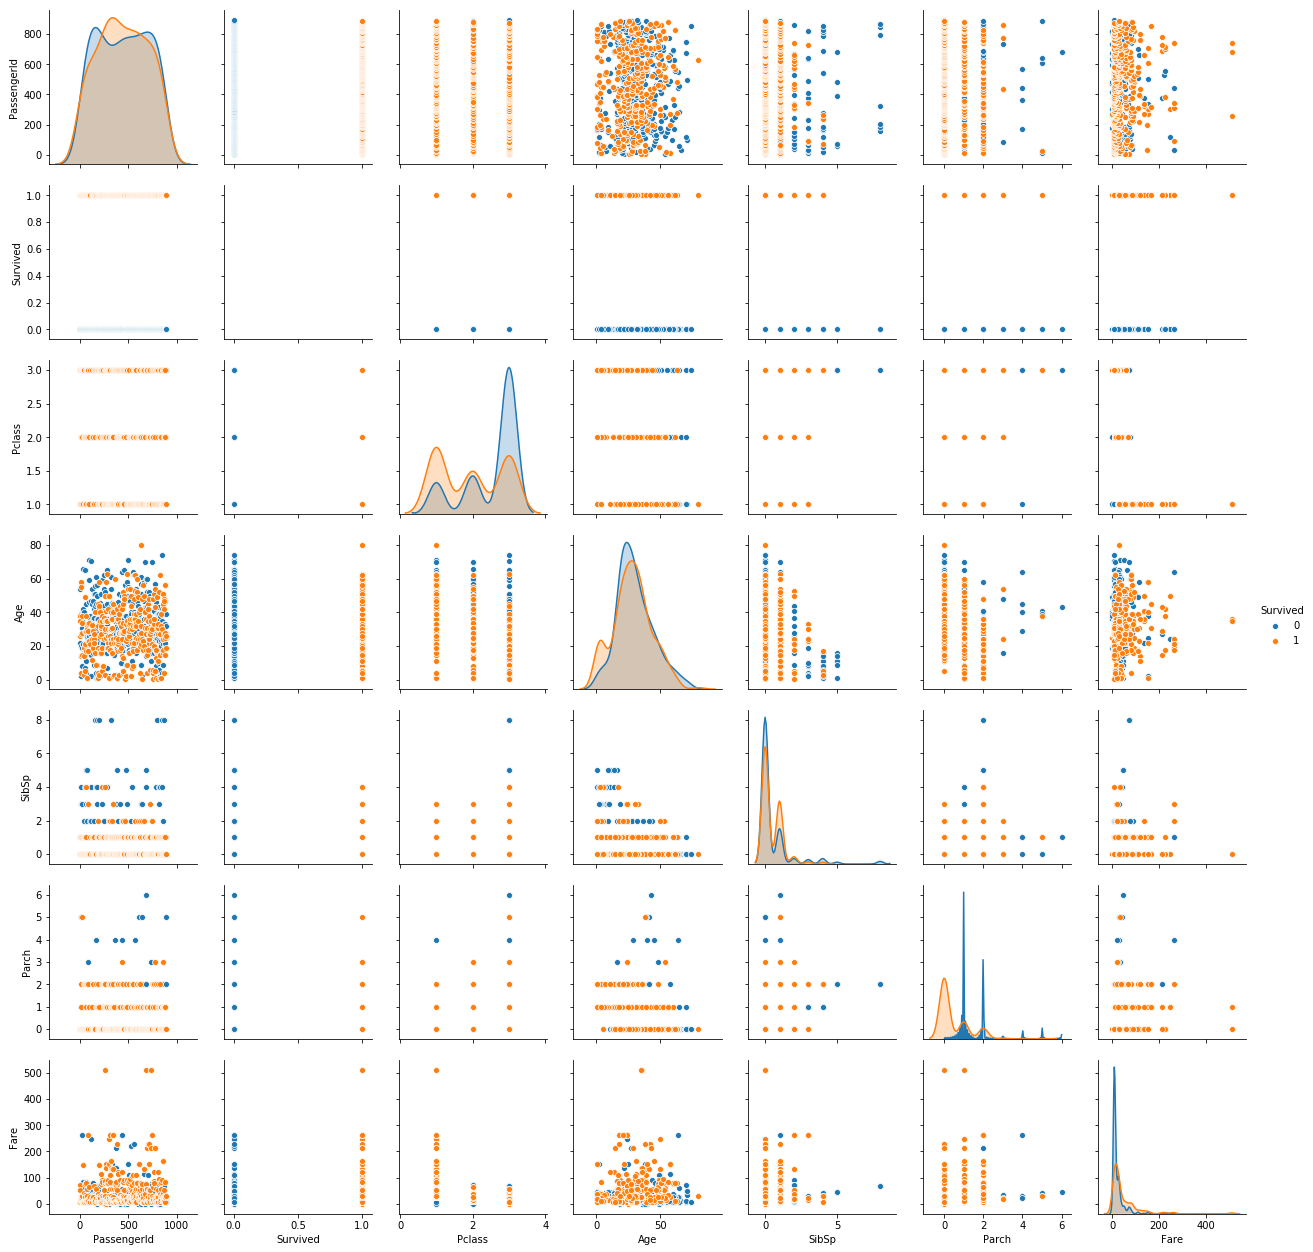

In [15]:
sns.pairplot(Train_df, hue = 'Survived')

# 1.3.2 Feature Analysis - Pclass (Passenger Class)

From the below classwise distribution it seems likely the proportion of survivors in class 1 is high compared to class 2 which is higher than class 3. 

Class seems to be very good feature for our model, as there's a substantial divide between survivors & non-survivors for differnt classes.

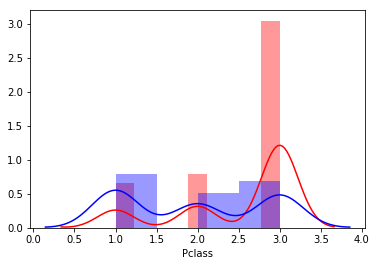

In [16]:
sns.distplot(Train_df[Train_df.Survived == 0]['Pclass'], color = 'red')
sns.distplot(Train_df[Train_df.Survived == 1]['Pclass'], color = 'blue')

Classwise frequency distribution of survivors and non-survivors reiterates the importance of class as to if a passenger is saved or not

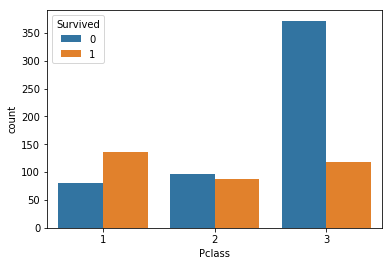

In [17]:
sns.countplot(x='Pclass', hue = 'Survived', data = Train_df)

# 1.3.3 Feature Analysis - Sex

Below gender wise separation of survivors and non-survivors shows a significant separation. Proportionately it's clear that more woman were saved comapred to men irrespective of class. This may be due to old and faulty notion that Women either were  more weaker or more innocent comapred to men (who assume themselves to be saviour because of ubiquitious patriachy at that time). However it's clear that females had higher chance of survival comapred to males, hence Sex is a very important feature for our model, but we need to binary encode the column before we use it in the model as most classifier deal with only numerical values.

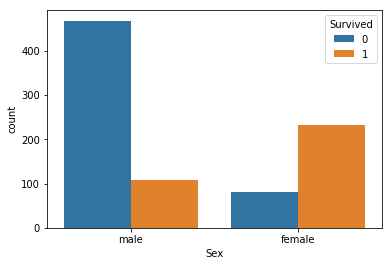

In [18]:
sns.countplot(x='Sex', hue = 'Survived', data = Train_df)

Below crosstab quantifies above point. Females across all classes had a survival rate of close to <b>65%</b>, whereas male had a very low survival rate of <b>19%</b>.

In [19]:
pd.crosstab(pd.Categorical(Train_df.Sex), pd.Categorical(Train_df.Survived), margins = True)

col_0,0,1,All
row_0,,,
female,81,233,314
male,468,109,577
All,549,342,891


Now let's see if class had any effect on which female survived.

As expected, proportionately females from class 1 and class 2 have a near perfect survival rate, whereas Women from 3rd class had a survival rate of 50%. 

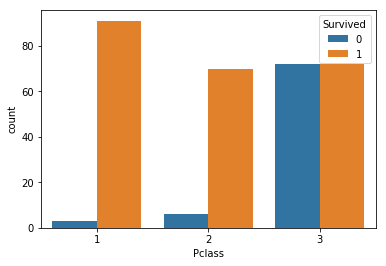

In [20]:
sns.countplot('Pclass', hue = 'Survived', data = Train_df[(Train_df.Sex == 'female')])

As expected, survival rate decreased with decrease in level of class. Again reiterating the notion that people with money, influence and power naturally survived more because of the aforementioned factors.

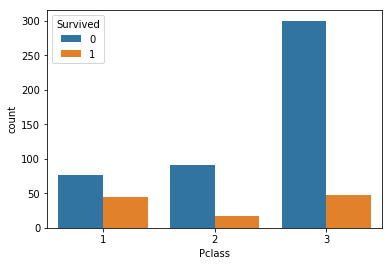

In [21]:
sns.countplot('Pclass', hue = 'Survived', data = Train_df[(Train_df.Sex == 'male')])

# 1.3.4 Feature Analysis - Blood Relatives: SibSp (Siblings) & Parch (Parent-Child)

We've 2 columns which tells us that if a passenger had any blood relatives on the ship. First let us see if an increase in relatives means a higher chance at survival

If we disregard the smaller values for high siblings and parent child relationships, generally it seems passengers with blood relatives on board have higher chance of survival.

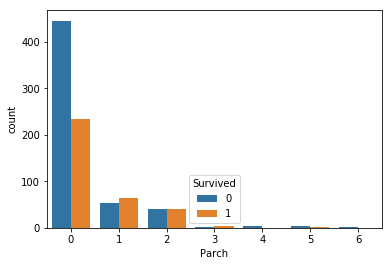

In [22]:
sns.countplot(x='Parch', hue='Survived', data=Train_df)

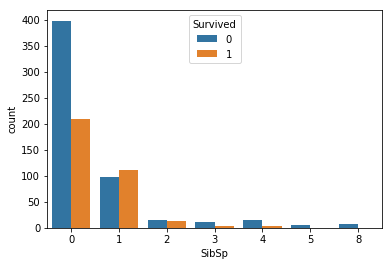

In [23]:
sns.countplot(x='SibSp', hue='Survived', data=Train_df)

It makes sense to combine both this column into one binary columns as 'BloodRelative', however we're not yet dropping the original columns as it may aid in discovery of missing values for Age and Cabin.

In [24]:
def get_relative(row):
    return int((row['SibSp'] > 0) | (row['Parch'] > 0))
Train_df['BloodRelative'] = Train_df[['SibSp', 'Parch']].apply(get_relative, axis=1)
Test_df['BloodRelative'] = Test_df[['SibSp', 'Parch']].apply(get_relative, axis=1)

Again reiterating the notion that Passenger with relatives had higher chance of survival

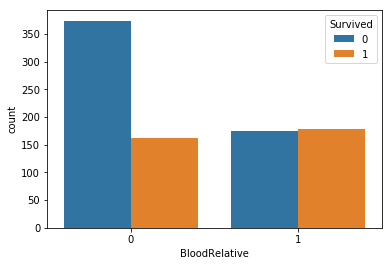

In [25]:
sns.countplot(x='BloodRelative', hue='Survived', data=Train_df)

Class 3 had higher proportion of passengers with no relatives, may be these were the people who didn't survive, we need further analysis before we can confirm this.

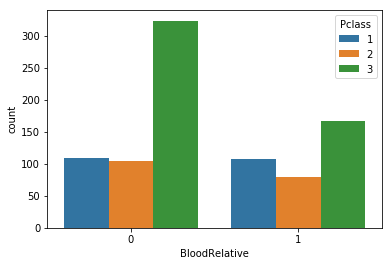

In [26]:
sns.countplot(x='BloodRelative', hue='Pclass', data=Train_df)

Passegers of class 3 with blood relatives definitely had a higher survival rate compared to passengers with no relatives. Let's  check if same is true for other classes

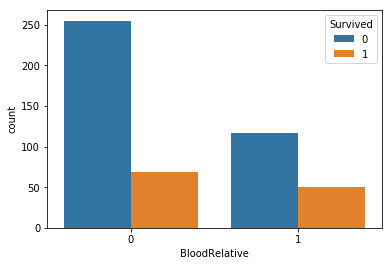

In [27]:
sns.countplot(x='BloodRelative', hue='Survived', data=Train_df[Train_df['Pclass'] == 3])

Evident from below, same is true for Class 2 and 3. One hypothesis why this might've happened is that many of those Females who were rescued were rescued along with children. But all in all this newly created feature is evidently important for our model.

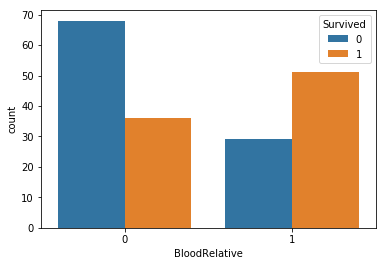

In [28]:
sns.countplot(x='BloodRelative', hue='Survived', data=Train_df[Train_df['Pclass'] == 2])

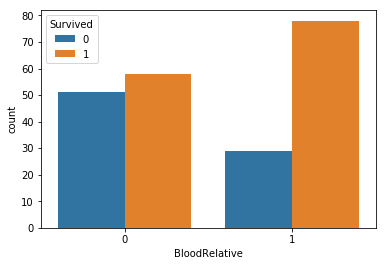

In [29]:
sns.countplot(x='BloodRelative', hue='Survived', data=Train_df[Train_df['Pclass'] == 1])

# 1.3.4 Feature Analysis - Name

We already know that each of these name are unique but we let's see if we can weed out any information from these features such as married/unmarried, husband/wife, child ..etc

It's clear from the below analysis that mapping of husband wife from surname is not straight forward. Hence we will refrain from it.

In [30]:
print(Train_df[(Train_df['Sex'] == 'male') & (Train_df['Parch'] > 0)].Name.count())
print(Train_df[(Train_df['Sex'] == 'male') & (Train_df['Parch'] > 0)].Name.str.split(',').str[0].nunique())
print(Train_df[(Train_df['Sex'] == 'female') & (Train_df['Parch'] > 0)].Name.count())
print(Train_df[(Train_df['Sex'] == 'female') & (Train_df['Parch'] > 0)].Name.str.split(',').str[0].nunique())

93
63
120
77


Below analysis tells us that there were around 40 male childs with age upto 12 around which 23 managed to survive again not a great divide for such a small subsection, so we refrain from creating a column but we can use this analysis to fill out missing age values to passengers with masters in their name.

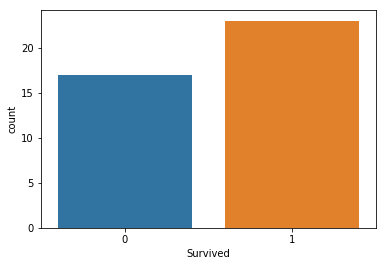

In [31]:
sns.countplot(Train_df[(Train_df['Name'].str.contains('Master'))].Survived)

In [32]:
print(Train_df[(Train_df['Name'].str.contains('Master'))].Age.max())

12.0


We can't conclude anything from this, since females in general had higher chance of survival

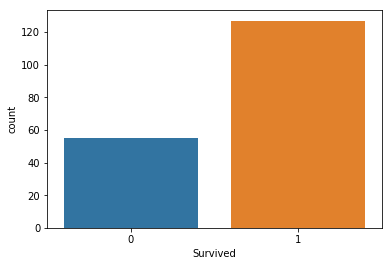

In [33]:
sns.countplot(Train_df[(Train_df['Name'].str.contains('Miss'))].Survived)

Let's see if we can derive titles out. From below we can see that we can indeed draw these features out but we're not sure how helpful it'll be.

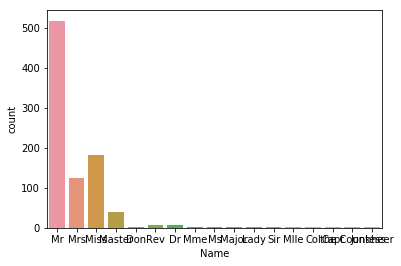

In [34]:
sns.countplot(Train_df['Name'].str.split(', ').str[1].str.split('.').str[0])

We divide the titles into 5 groups (Master, Mrs, Miss, Master and Other) based on above analysis. 

In [35]:
Train_df['Title'] = Train_df['Name'].str.split(', ').str[1].str.split('.').str[0].apply(
    lambda x: x if (x =='Mr') 
    else (x if (x == 'Mrs') 
          else (x if (x == 'Miss') 
                else (x if (x == 'Master') else 'Other')
               )
         )
)
Test_df['Title'] = Test_df['Name'].str.split(', ').str[1].str.split('.').str[0].apply(
    lambda x: x if (x =='Mr') 
    else (x if (x == 'Mrs') 
          else (x if (x == 'Miss') 
                else (x if (x == 'Master') else 'Other')
               )
         )
)

From below we can see that married women have higher chance of survival than unmarried women, probably this will be useful in sub-categorisation of female passengers

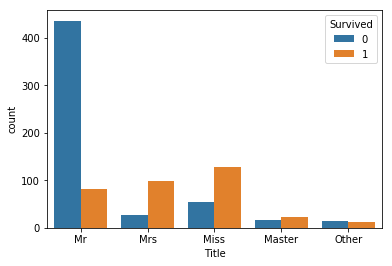

In [36]:
sns.countplot(x = 'Title', hue = 'Survived', data = Train_df)

# 1.3.5 Feature Analysis - Fare

It seems that fares aren't showing significant difference for non-survivors and survivors for class 1 and 2, but clearly there's some siginficant increase in survival rate  with increase in ticket prices but still we cannot clearly say if it will be useful in our model. For now we delay our decision on the imporatnce of fare, we'll decide it as we adjust the model.

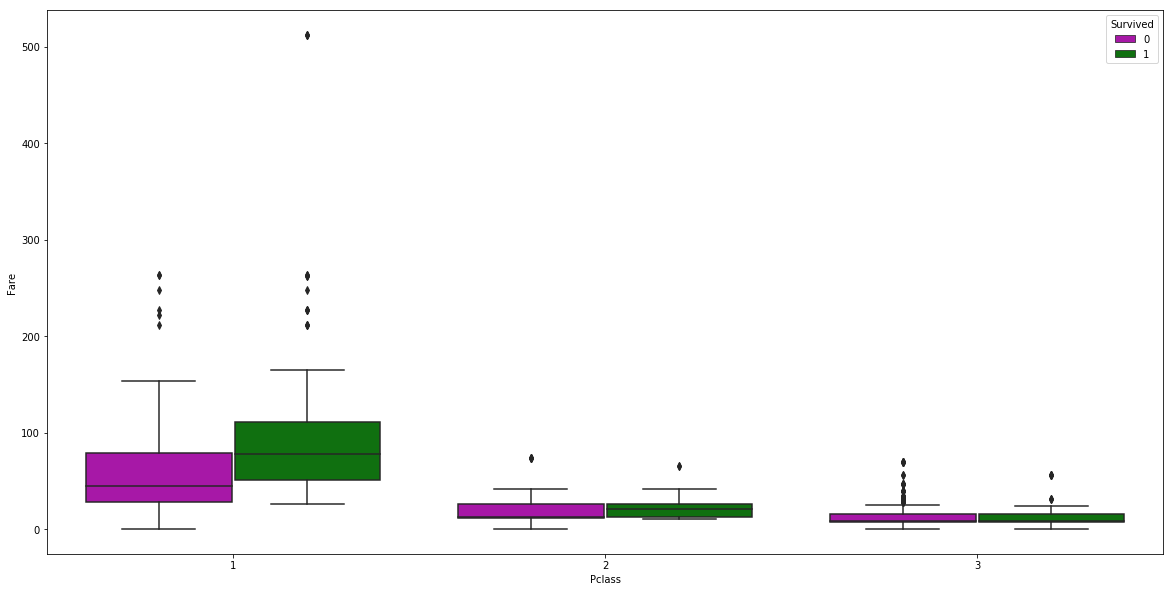

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass', y="Fare",
            hue="Survived", palette=["m", "g"],
            data=Train_df)

# 1.3.6 Feature Analysis - Ticket

Too many unique values means we'd most likely drop this column as adding this column will only result in over fitting of the model

In [38]:
Train_df['Ticket'].nunique()

681

In [39]:
Train_df = Train_df.drop(['Ticket'], axis = 1)
Test_df = Test_df.drop(['Ticket'], axis = 1)

In [40]:
print(Train_df.columns)
print(Test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'BloodRelative', 'Title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'BloodRelative', 'Title'],
      dtype='object')


# 1.3.7 Feature Analysis - Embarked

Majority of passengers were from Southampton, thus the disproportionate represenation for  survivors, interestingly passengers who boarded at Cheroboug have a higher survival rate, but they're very few in numbers. We're still on fence about adding this column to the model, we again decide to delay the decision and decide dynmically based on the model performance but intuitively it seems they may not be of much use. Additionally we fix the 2 missing values by setting it to 'S' ( for Southhampton)

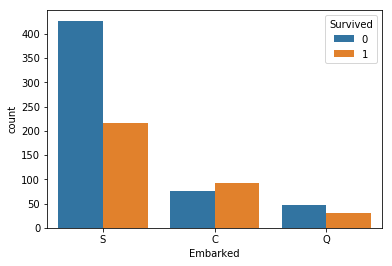

In [41]:
sns.countplot(x='Embarked', hue='Survived', data = Train_df)

In [42]:
Train_df.Embarked = Train_df.Embarked.fillna('S')

# 1.3.8 Feature Analysis - Cabin

Quite Clearly there is a siginificant difference, Additionally  we'd want see if people had cabin at same deck level had higher chances of survival

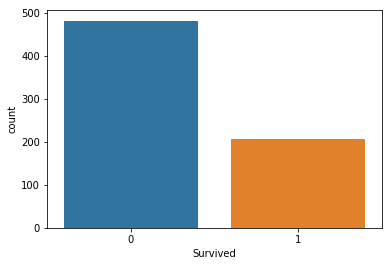

In [43]:
sns.countplot(x = 'Survived', data = Train_df[(Train_df.Cabin.isna())])

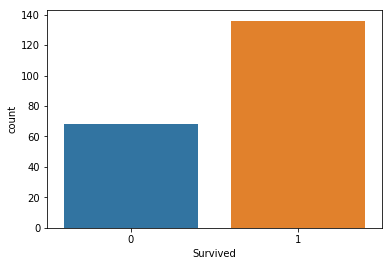

In [44]:
sns.countplot(x = 'Survived', data = Train_df[~(Train_df.Cabin.isna())])

We have 7 unique labels for decks or sections, we'd want to add this to our table to see if this has any impact on the survival and also check if this covers the same information as Class

In [45]:
Train_df[~(Train_df.Cabin.isna())].Cabin.str[0].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [46]:
Train_df['Deck'] = Train_df['Cabin'].str[0].apply(
    lambda x: 'N' if (x == '') 
    else x
)
Test_df['Deck'] = Test_df['Cabin'].str[0].apply(
    lambda x: 'NC' if (x == '') 
    else x
)

As suspected although there's some significant difference in deck level but it seems that class is already capturing the difference. So we're more likely to drop this newly created variable. But clearly there's some order in the deck we'll create a ordinal feature to cover this and assign the missing values as 0.

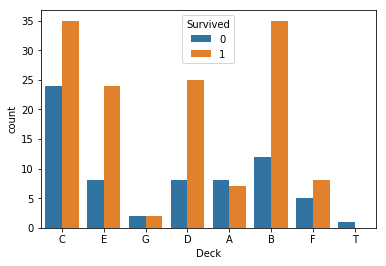

In [47]:
sns.countplot(x='Deck', hue='Survived', data= Train_df)

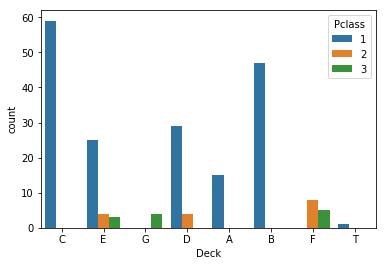

In [48]:
sns.countplot(x='Deck', hue='Pclass', data= Train_df)

In [49]:
Train_df['Deck'] = Train_df['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 5, "E": 6, "F": 7, "G": 8, "T": 4})
Train_df['Deck'] = Train_df['Deck'].fillna(0)
Train_df['Deck'] = Train_df['Deck'].astype(int)
Test_df['Deck'] = Test_df['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 5, "E": 6, "F": 7, "G": 8, "T": 4})
Test_df['Deck'] = Test_df['Deck'].fillna(0)
Test_df['Deck'] = Test_df['Deck'].astype(int)

Clearly there's some difference in the survival rates of class 1 passenger based on deck, but we're not sure as to how it'll aid in our model.

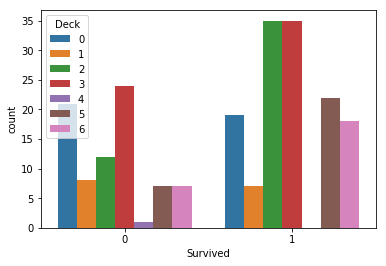

In [50]:
sns.countplot(x='Survived', hue='Deck', data= Train_df[Train_df.Pclass == 1])

# 1.3.9 Feature Analysis - Age

Let's start with our analysis of Age. There are 177 missing values let's see how we can fix this.

As we can see from below although there's a single peak quite clearly but still Age is not normally distributed hence we cannnot use random normal distribution to fill out values rather we divide missing values into groups and then assign values probabilistically.

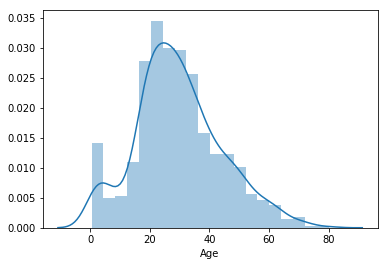

In [51]:
sns.distplot(Train_df[~Train_df['Age'].isna()].Age)

People with missing age are mostly from class 3, let's further divide it into groups so that we proportionately assign values

In [52]:
Train_df[Train_df.Age.isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,177.0,435.581921,250.552901,6.0,230.00,452.00,634.00,889.000
Survived,177.0,0.293785,0.456787,0.0,0.00,0.00,1.00,1.000
Pclass,177.0,2.598870,0.763216,1.0,3.00,3.00,3.00,3.000
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,177.0,0.564972,1.626316,0.0,0.00,0.00,0.00,8.000
Parch,177.0,0.180791,0.534145,0.0,0.00,0.00,0.00,2.000
Fare,177.0,22.158567,31.874608,0.0,7.75,8.05,24.15,227.525
BloodRelative,177.0,0.248588,0.433420,0.0,0.00,0.00,0.00,1.000
Deck,177.0,0.378531,1.255982,0.0,0.00,0.00,0.00,7.000


Proportionately Adult males havee large number of missing values, first we'll assign mean to  sammler groups and then see if we can do a further class wise subsection for adult males

In [53]:
print('Train')
print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0)].PassengerId.count())
print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0)].PassengerId.count())
print(Train_df[(Train_df['Title'] == 'Master') & ~(Train_df.Age > 0)].PassengerId.count())
print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0)].PassengerId.count())
print(Train_df[(Train_df['Title'] == 'Other') & ~(Train_df.Age > 0)].PassengerId.count())
print('Test')
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Master') & ~(Test_df.Age > 0)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Other') & ~(Test_df.Age > 0)].PassengerId.count())

Train
36
17
4
119
1
Test
14
10
4
57
1


First write 2 general functions each for test and train to deal with all categories except 'Mr' and test it.

In [54]:
def FixAgeTrain(title, pclass = 0):
    cls = [1,2,3]
    if pclass > 0:
        cls = [pclass]
    np.random.seed(44)
    index_list = Train_df[(Train_df['Title'] == title) & ~(Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].index
    mean = Train_df[(Train_df['Title'] == title) & (Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].Age.mean()
    std = Train_df[(Train_df['Title'] == title) & (Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].Age.std()
    count = Train_df[(Train_df['Title'] == title) & ~(Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].PassengerId.count()
    age_values = np.random.randint(mean - std, mean + std, size = count)
    counter = 0
    
    for i in index_list:
        Train_df.iloc[i,5] = age_values[counter]
        counter = counter + 1
        
def FixAgeTest(title, pclass = 0):
    cls = [1,2,3]
    if pclass > 0:
        cls = [pclass]
    np.random.seed(44)
    index_list = Test_df[(Test_df['Title'] == title) & ~(Test_df.Age > 0) & (Test_df.Pclass.isin(cls))].index
    mean = Train_df[(Train_df['Title'] == title) & (Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].Age.mean()
    std = Train_df[(Train_df['Title'] == title) & (Train_df.Age > 0) & (Train_df.Pclass.isin(cls))].Age.std()
    count = Test_df[(Test_df['Title'] == title) & ~(Test_df.Age > 0) & (Test_df.Pclass.isin(cls))].PassengerId.count()
    age_values = np.random.randint(mean - std, mean + std, size = count)
    counter = 0
    
    for i in index_list:
        Test_df.iloc[i,4] = age_values[counter]
        counter = counter + 1

Testing the Age fixing function

In [55]:
np.random.seed(44)
train = Test_df.copy()
title = 'Master'
index_list = train[(train['Title'] == title) & ~(train.Age > 0)].index
mean = train[(train['Title'] == title) & (train.Age > 0)].Age.mean()
std = train[(train['Title'] == title) & (train.Age > 0)].Age.std()
count = train[(train['Title'] == title) & ~(train.Age > 0)].PassengerId.count()
age_values = np.random.randint(mean - std, mean + std, size = count)
counter = 0
print(index_list); print(mean);print(std); print(age_values);

for i in index_list:
    old = i
    print(i)
    print(counter)
    print(train.iloc[i,4])
    train.iloc[i,4] = age_values[counter]
    counter = counter + 1
    print(train.iloc[old,4])


Int64Index([244, 339, 344, 417], dtype='int64')
7.406470588235294
4.67246982491122
[6 5 3 5]
244
0
nan
6.0
339
1
nan
5.0
344
2
nan
3.0
417
3
nan
5.0


Assigning values for young adults for both test and train set

In [56]:
print(Train_df[(Train_df['Title'] == 'Master') & ~(Train_df.Age > 0)].PassengerId.count())
FixAgeTrain('Master')
print(Train_df[(Train_df['Title'] == 'Master') & ~(Train_df.Age > 0)].PassengerId.count())

4
0


In [57]:
print(Test_df[(Test_df['Title'] == 'Master') & ~(Test_df.Age > 0)].PassengerId.count())
FixAgeTest('Master')
print(Test_df[(Test_df['Title'] == 'Master') & ~(Test_df.Age > 0)].PassengerId.count())

4
0


Assigning values for passenger with other titles for both test and train set

In [58]:
print(Train_df[(Train_df['Title'] == 'Other') & ~(Train_df.Age > 0)].PassengerId.count())
FixAgeTrain('Other')
print(Train_df[(Train_df['Title'] == 'Other') & ~(Train_df.Age > 0)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Other') & ~(Test_df.Age > 0)].PassengerId.count())
FixAgeTest('Other')
print(Test_df[(Test_df['Title'] == 'Other') & ~(Test_df.Age > 0)].PassengerId.count())

1
0
1
0


Assigning values for married females for both test and train set by class since there's a significant difference in ages based on the class

In [59]:
Train_df[(Train_df['Title'] == 'Mrs') & (Train_df.Age > 0)].groupby('Pclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,34.0,40.882353,12.643754,17.0,35.0,41.5,50.75,62.0
2,41.0,33.682927,10.318525,14.0,26.0,32.0,41.00,57.0
3,33.0,33.515152,10.031579,15.0,27.0,31.0,40.00,63.0


In [60]:
print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
FixAgeTrain('Mrs',1)
print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())
FixAgeTest('Mrs',1)
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
FixAgeTrain('Mrs',2)
print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())
FixAgeTest('Mrs',2)
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
FixAgeTrain('Mrs',3)
print(Train_df[(Train_df['Title'] == 'Mrs') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())
FixAgeTest('Mrs',3)
print(Test_df[(Test_df['Title'] == 'Mrs') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())

8
0
2
0
0
0
1
0
9
0
7
0


Assigning values for unmarried females (including childs) for both test and train set by class since there's a significant difference in ages based on the class and also because the this particular category has 36 missing values which is not a small number

In [61]:
Train_df[(Train_df['Title'] == 'Miss') & (Train_df.Age > 0)].groupby('Pclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,45.0,30.000000,12.852308,2.00,21.00,30.0,36.000,63.0
2,32.0,22.390625,13.374708,2.00,11.75,24.0,30.625,50.0
3,69.0,16.123188,9.697315,0.75,9.00,18.0,22.000,45.0


In [62]:
print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
FixAgeTrain('Miss',1)
print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())
FixAgeTest('Miss',1)
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
FixAgeTrain('Miss',2)
print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())
FixAgeTest('Miss',2)
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
FixAgeTrain('Miss',3)
print(Train_df[(Train_df['Title'] == 'Miss') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())
FixAgeTest('Miss',3)
print(Test_df[(Test_df['Title'] == 'Miss') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())

1
0
0
0
2
0
0
0
33
0
14
0


Quite clearly the age values differ across for classes Males, so let's assign group values class wise for Males

In [63]:
Train_df[(Train_df['Title'] == 'Mr') & (Train_df.Age > 0)].groupby('Pclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,87.0,41.580460,14.148275,17.0,29.50,40.0,50.500,80.0
2,82.0,32.768293,11.850977,16.0,24.25,31.0,36.375,70.0
3,229.0,28.724891,10.490946,11.0,21.00,26.0,34.000,74.0


In [64]:
print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
FixAgeTrain('Mr',1)
print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 1)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())
FixAgeTest('Mr',1)
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 1)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
FixAgeTrain('Mr',2)
print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 2)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())
FixAgeTest('Mr',2)
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 2)].PassengerId.count())

print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
FixAgeTrain('Mr',3)
print(Train_df[(Train_df['Title'] == 'Mr') & ~(Train_df.Age > 0) & (Train_df.Pclass == 3)].PassengerId.count())
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())
FixAgeTest('Mr',3)
print(Test_df[(Test_df['Title'] == 'Mr') & ~(Test_df.Age > 0) & (Test_df.Pclass == 3)].PassengerId.count())

20
0
7
0
9
0
4
0
90
0
46
0


The below distribution plot of Age by Survival rate allows us divide age into 3 broader ordinal categories. <br/>
 0: For High Survival rate (Age 0-16) <br/>
 1: For Equal/Similar Survival rate (Age 41 and above) <br/>
 2: For Low Survival rate (Age 17 - 40)

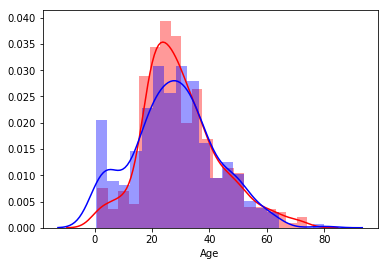

In [65]:
sns.distplot(Train_df[Train_df.Survived == 0].Age, color = 'red', bins = 20)
sns.distplot(Train_df[Train_df.Survived == 1].Age, color = 'blue', bins = 20)

In [66]:
Train_df['AgeGroup'] = Train_df.Age.astype(int).apply(lambda x: 0 if x <= 16
                                         else (1 if x > 40
                                              else 2))
Test_df['AgeGroup'] = Test_df.Age.astype(int).apply(lambda x: 0 if x <= 16
                                         else (1 if x > 40
                                              else 2))

# 1.4 Data Preprocessing

First let's create a copy so as to we don't corrupt our analysis and wrangling so far

In [67]:
Train_alt = Train_df.copy()
Test_alt = Test_df.copy()

In [68]:
Train_alt.nunique()

PassengerId      891
Survived           2
Pclass             3
Name             891
Sex                2
Age               88
SibSp              7
Parch              7
Fare             248
Cabin            147
Embarked           3
BloodRelative      2
Title              5
Deck               9
AgeGroup           3
dtype: int64

Lets Binary encode sex column as it is only column with strings as 2 categories

In [69]:
Train_alt.Sex = Train_alt.Sex.map({'male': 0, 'female':1})
Test_alt.Sex = Test_alt.Sex.map({'male': 0, 'female':1})

In [70]:
print(Train_alt.Sex.unique())
print(Test_alt.Sex.unique())

[0 1]
[0 1]


Let's one hot encode all nominal categorical variables & check if the columns are correctly converted

In [71]:
Train_alt = pd.concat([Train_alt, pd.get_dummies(Train_alt['Embarked'], drop_first=True)], axis=1);
Train_alt = pd.concat([Train_alt, pd.get_dummies(Train_alt['Title'], drop_first=True)], axis=1);

Test_alt = pd.concat([Test_alt, pd.get_dummies(Test_alt['Embarked'], drop_first=True)], axis=1);
Test_alt = pd.concat([Test_alt, pd.get_dummies(Test_alt['Title'], drop_first=True)], axis=1);

In [72]:
print(Train_alt.columns)
print(Test_alt.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'BloodRelative', 'Title', 'Deck',
       'AgeGroup', 'Q', 'S', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'BloodRelative', 'Title', 'Deck', 'AgeGroup', 'Q',
       'S', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')


Lets drop columns, those that will not be advantageous to our model based on prior analysis & those which have been transformed to either one or multiple columns

In [73]:
Train_alt = Train_alt.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title'], axis = 1)
Test_alt = Test_alt.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title'], axis = 1)

In [74]:
print(Train_alt.columns)
print(Test_alt.columns)
print(Train_alt.shape)
print(Test_alt.shape)

Index(['Survived', 'Pclass', 'Sex', 'BloodRelative', 'Deck', 'AgeGroup', 'Q',
       'S', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')
Index(['Pclass', 'Sex', 'BloodRelative', 'Deck', 'AgeGroup', 'Q', 'S', 'Miss',
       'Mr', 'Mrs', 'Other'],
      dtype='object')
(891, 12)
(418, 11)


# 2. Model Tuning

Get values minus the label & store it in a variable and store labels in a separate variable. Check for the shapes to see if they've equal number of rows.

In [75]:
X = Train_alt.iloc[:,1:]
y = Train_alt.iloc[:,0]
print(X.shape)
print(y.shape)
print(X.shape)
print(y.shape)

(891, 11)
(891,)
(891, 11)
(891,)


# 2.1 Cross Validation

In this section we will pick up different classifiers and perform cross-validation analysis on various version of these classifiers to pick the best version of the classifier

# 2.1.1 Decision Trees

We create multiple decision trees with different nodes and check which variation of the decision tree fits our data best.

In [76]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt4 = DecisionTreeClassifier(max_depth=4)
dt6 = DecisionTreeClassifier(max_depth=6)
dt8 = DecisionTreeClassifier(max_depth=8)
dt10 = DecisionTreeClassifier(max_depth=10)
dt12 = DecisionTreeClassifier(max_depth=12)
dt15 = DecisionTreeClassifier(max_depth=15)
dt20 = DecisionTreeClassifier(max_depth=20)
dt40 = DecisionTreeClassifier(max_depth=40)

In [77]:
dt2_score = cross_val_score(dt2, X, y, cv=10, scoring='accuracy')
dt4_score = cross_val_score(dt4, X, y, cv=10, scoring='accuracy')
dt6_score = cross_val_score(dt6, X, y, cv=10, scoring='accuracy')
dt8_score = cross_val_score(dt8, X, y, cv=10, scoring='accuracy')
dt10_score = cross_val_score(dt10, X, y, cv=10, scoring='accuracy')
dt12_score = cross_val_score(dt12, X, y, cv=10, scoring='accuracy')
dt15_score = cross_val_score(dt15, X, y, cv=10, scoring='accuracy')
dt20_score = cross_val_score(dt20, X, y, cv=10, scoring='accuracy')
dt40_score = cross_val_score(dt40, X, y, cv=10, scoring='accuracy')

In [78]:
dt_accuracy = { 'Depth': [2,4,6,8,10,12,15,20,40],
    'Score': [dt2_score.mean(),dt4_score.mean(),dt6_score.mean(),dt8_score.mean(), dt10_score.mean(),
                          dt12_score.mean(), dt15_score.mean(),dt20_score.mean(), dt40_score.mean()]
                   }
dt_accuracy_df = pd.DataFrame.from_dict(dt_accuracy)
print(dt_accuracy_df)

   Depth     Score
0      2  0.789109
1      4  0.798048
2      6  0.809297
3      8  0.804802
4     10  0.804777
5     12  0.804764
6     15  0.801380
7     20  0.802504
8     40  0.802504


Decision tree with 6 nodes had the best performance let's find out the feature importance this will further help us tone down the features

In [79]:
dt6.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
print(dict(zip(X.columns, dt6.feature_importances_)))

{'Pclass': 0.13481845088310304, 'Sex': 0.03288033100049947, 'BloodRelative': 0.015465032151328524, 'Deck': 0.09465708246739728, 'AgeGroup': 0.03309392624925599, 'Q': 0.0189482193430236, 'S': 0.04549052366538738, 'Miss': 0.0022848576295585402, 'Mr': 0.5663752484292829, 'Mrs': 0.003013387419837071, 'Other': 0.05297294076132614}


Clearly separate tilte columns are warping the sex column, It'd be better to drop if we drop  either the titles or sex and age group as both of these seem to capture the same combined info. After dropping of Title lets repeat the same analysis again. Also we'd like to drop Blood Relative as it's not aiding much and we also remove Deck as we believe from our analysis that Deck might be Skewing our Model predictions.

In [81]:
X = Train_alt.iloc[:,1:]
X_test = Test_alt
print(X.shape)
print(X_test.shape)
X = X.drop(['BloodRelative', 'Sex', 'AgeGroup', 'Deck'], axis = 1)
X_test = Test_alt.drop(['BloodRelative', 'Sex', 'AgeGroup', 'Deck'], axis = 1)
print(X.shape)
print(X_test.shape)

(891, 11)
(418, 11)
(891, 7)
(418, 7)


In [82]:
dt2_score = cross_val_score(dt2, X, y, cv=10, scoring='accuracy')
dt4_score = cross_val_score(dt4, X, y, cv=10, scoring='accuracy')
dt6_score = cross_val_score(dt6, X, y, cv=10, scoring='accuracy')
dt8_score = cross_val_score(dt8, X, y, cv=10, scoring='accuracy')
dt10_score = cross_val_score(dt10, X, y, cv=10, scoring='accuracy')
dt12_score = cross_val_score(dt12, X, y, cv=10, scoring='accuracy')
dt15_score = cross_val_score(dt15, X, y, cv=10, scoring='accuracy')
dt20_score = cross_val_score(dt20, X, y, cv=10, scoring='accuracy')
dt40_score = cross_val_score(dt40, X, y, cv=10, scoring='accuracy')

Evidently, Tuning of feature set has eveidently improved the performance of the model. For now we continue with the toned down feature set for further analysis 

In [83]:
dt_accuracy = { 'Depth': [2,4,6,8,10,12,15,20,40],
    'Score': [dt2_score.mean(),dt4_score.mean(),dt6_score.mean(),dt8_score.mean(), dt10_score.mean(),
                          dt12_score.mean(), dt15_score.mean(),dt20_score.mean(), dt40_score.mean()]
                   }
dt_accuracy_df = pd.DataFrame.from_dict(dt_accuracy)
print(dt_accuracy_df)

   Depth     Score
0      2  0.789109
1      4  0.819309
2      6  0.826089
3      8  0.826089
4     10  0.826089
5     12  0.826089
6     15  0.826089
7     20  0.826089
8     40  0.826089


# 2.1.2 Naive Bayes - Gaussian

Although the Naive Bayes classifier accounts well for missing scenarios it's unlikely we've any missing scenarios here. From results below Naive Bayes performs poorly incomparison to Decisin trees in general and there's also  a slight suggestion that around 20% of data in d-dimensional space are very close to each other causing the wrong asssignment of probabailities

In [84]:
nb = GaussianNB()
nb_scores_1 = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
nb_scores_1.mean()

0.7788576779026217

# 2.1.3 Support Vector Machine (SVM) - Linear

SVM linear performs marginally better than Naive Bayes and again alludes to the notion that around 20% data from both the classes are overlapping, hence the reduction in accuracy

In [85]:
svm_linear = SVC(C=1.5, kernel='linear')
svm_scores_1 = cross_val_score(svm_linear, X, y,cv=10, scoring='accuracy')
svm_scores_1.mean()

0.782203495630462

# 2.1.4 Support Vector Machine (SVM) - Radial Basis Function(RBF)

SVM RBF matches it's performance with decision tree but one advantage of decision trees is that it is simple and easy to explain where as SVMs in general are blackboxes which cannot be explained.

In [86]:
svm_rbf_1 = SVC(C = .50, kernel='rbf', gamma=1) 
svm_rbf_scores_1 = cross_val_score(svm_rbf_1, X, y, cv=10, scoring='accuracy')
print(svm_rbf_scores_1.mean())

0.8260886959482464


# 2.1.5 Support Vector Machine (SVM) - Polynomial

SVM Polynomial of degree 3 matches it's performance with decision tree but again is very tedious and difficult to explain. Since there's no marked improvement most likely we will not consider this classifier

In [99]:
svm_poly = SVC(C=10, kernel='poly',degree=1, gamma = 'auto')
svm_poly_2 = SVC(C=10, kernel='poly',degree=2, gamma = 'auto')
svm_poly_3 = SVC(C=20, kernel='poly',degree=3, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly, X, y, cv=10, scoring='accuracy')
svm_poly_scores_2 = cross_val_score(svm_poly_2, X, y, cv=10, scoring='accuracy')
svm_poly_scores_3 = cross_val_score(svm_poly_3, X, y, cv=10, scoring='accuracy')

In [88]:
svm_poly_accuracy_df = pd.DataFrame.from_dict({ 'Order': [1,2,3],
    'Score': [svm_poly_scores.mean(),svm_poly_scores_2.mean(),svm_poly_scores_3.mean()]})
print(svm_poly_accuracy_df)

   Order     Score
0      1  0.782203
1      2  0.787872
2      3  0.821657


# 2.1.6 K-Nearest Neighbour (KNN)

Although KNN does better than Naive Bayes and SVM Linear but still fares poorly incomaparison to Decision Tree and SVM RBF.

In [89]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn20 = KNeighborsClassifier(n_neighbors=20)
knn1_score = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')
knn5_score = cross_val_score(knn5, X, y, cv=10, scoring='accuracy')
knn10_score = cross_val_score(knn10, X, y, cv=10, scoring='accuracy')
knn20_score = cross_val_score(knn20, X, y, cv=10, scoring='accuracy')
knn_accuracy_df = pd.DataFrame.from_dict({ 'Neighbours': [1,5,10,20],
    'Score': [knn1_score.mean(),knn5_score.mean(),knn10_score.mean(),knn20_score.mean()]})
print(knn_accuracy_df)

   Neighbours     Score
0           1  0.757774
1           5  0.811520
2          10  0.814865
3          20  0.813740


# 2.1.7 Logistic Regression

The traditional logistic regression classifier also fares poorly in comparison to the Decision Tree

In [90]:
logreg_score = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=10, scoring='accuracy')
print(logreg_score.mean())

0.7923544433094996


# 2.1.8 Random Forest

Random forest also manages to match the accuracy of Decision Tree and SVM but on a more general is more likely to do better than decision tree as we know decision tree algorithm are greedy algorithms and one misselection may lead to very dastardly consequences, hence we prefer Random Forest over Decision Tree, but we'd like to see if we can improve Decision tree by boosting it.

In [91]:
n_est_list = [1,2,3,4,5,10,20,40,100]
for n_est in n_est_list:
    random_forest = RandomForestClassifier(n_estimators=n_est)
    scores = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')
    print("Random Forest Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Random Forest Accuracy: 0.81 (+/- 0.03) #estimators: 1
Random Forest Accuracy: 0.82 (+/- 0.04) #estimators: 2
Random Forest Accuracy: 0.82 (+/- 0.04) #estimators: 3
Random Forest Accuracy: 0.82 (+/- 0.03) #estimators: 4
Random Forest Accuracy: 0.82 (+/- 0.04) #estimators: 5
Random Forest Accuracy: 0.82 (+/- 0.03) #estimators: 10
Random Forest Accuracy: 0.82 (+/- 0.04) #estimators: 20
Random Forest Accuracy: 0.82 (+/- 0.04) #estimators: 40
Random Forest Accuracy: 0.82 (+/- 0.03) #estimators: 100


# 2.1.9 Boosting 

Boosting slightly increases the overall accuracy but the risk of wrongly assigning large weights to abberations can damage the model very badly. Since risk is not so rewarding, we refrain from using the boosting classifier.

In [92]:
dt = DecisionTreeClassifier(max_depth=6)
n_est_list = [1,2,3,4,5,10,15,40]
for n_est in n_est_list:
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    scores = cross_val_score(boosting, X, y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.83 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.82 (+/- 0.04) #estimators: 2
Boosting Accuracy: 0.82 (+/- 0.04) #estimators: 3
Boosting Accuracy: 0.82 (+/- 0.03) #estimators: 4
Boosting Accuracy: 0.82 (+/- 0.03) #estimators: 5
Boosting Accuracy: 0.82 (+/- 0.03) #estimators: 10
Boosting Accuracy: 0.83 (+/- 0.03) #estimators: 15
Boosting Accuracy: 0.83 (+/- 0.03) #estimators: 40


# 2.2 Model Selection

Based on the above analysis it's clear that Decision Tree (Standalone & with boosting), SVM RBF, SVM Polynomial and Random Forest perform best on our dataset. We reject SVM RBF and SVM Polynomial because they don't offer any significant improvement 
considering the complexity each involves inaddition to lack of decision information. Further we reject Boosting, because although it does well in the cross-validation but when we fit the data there's a chance that it may wrongly assign big weights to very small anamolous data. Between Decision Tree and Random Forest we choose Random Forest since it aptly counters the greedy nature of decision tree classifier. Thus we decide to fit Random Forest Classfier for our data with 10 estimators (as this had the best accuracy among all estimators)  
<table>
    <tr>
        <th> Classifier</th>
        <th> Cross Vaildation Accuracy Score</th>
    </tr>
    <tr> <td>Decision Tree</td> <td bgcolor ='yellow'>82.6%</td></tr>
    <tr> <td>Naive Bayes</td> <td >77.9%</td></tr>
    <tr> <td>SVM Linear</td> <td>78.1%</td></tr>
    <tr> <td>SVM RBF</td> <td bgcolor ='yellow'>82.6%</td></tr>
    <tr> <td>SVM Polynomial</td> <td bgcolor ='yellow'>82.1%</td></tr>
    <tr> <td>KNN</td> <td>81.4%</td></tr>
    <tr> <td>Logistic Regression</td> <td>79.2%</td></tr>
    <tr> <td>Random Forest</td> <td bgcolor ='green'>83%</td></tr>
    <tr> <td>Boosting</td> <td bgcolor ='yellow'>82%</td></tr>
</table>

# 2.3 Final Model

We fit the final model by fitting the data to the Random Forest Classifier with 10 Estimators

In [93]:

Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Below are the features which aids the model most in it's decision making, as expected the effect of 'Mr' has been neutralized by multiple random decision trees

In [94]:
print(dict(zip(X.columns, Random_Forest.feature_importances_)))

{'Pclass': 0.24406723875009123, 'Q': 0.02829974606130125, 'S': 0.048920139263427635, 'Miss': 0.1375632523831914, 'Mr': 0.38890877019503245, 'Mrs': 0.12191918586067627, 'Other': 0.03032166748627991}


# 2.4 Prediction

In [95]:
y_pred = Random_Forest.predict(X_test)

# 2.5 Report Predicted Values to Local

In [96]:
Test_df_out = Test_df.copy()
Test_df_out = Test_df_out.drop(['Fare', 'Cabin', 'Sex', 'Embarked', 'Name', 'Parch', 'SibSp', 'Age', 'Pclass',
                                         'BloodRelative', 'Title', 'Deck', 'AgeGroup'], axis = 1)
Test_df_out['Survived'] = y_pred

In [97]:
print(Test_df_out.columns)
Test_df_out.shape

Index(['PassengerId', 'Survived'], dtype='object')


(418, 2)

In [98]:
Test_df_out.to_csv("C:/Users/nifaullah/Downloads/msba/WinBreak/Titanic/TitanicOut2.csv", index = False)

# 3. Conclusion
Overall 83% cross validation accuracy is a good figure if not great. If we were to apply more sophisticated deep learning techniques such as Artificial Neural Network or used an ensemble of classifiers we might have seen an improvement in the accuracy, but currently we don't have any evidence to support this claim. We intend to test out these and many other classifiers which were left out, in addition to some hyperparameter tuning, in the next version of our analyssis to see if we can improve the accuracy.